In [578]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics

In [579]:
train_df=pd.read_csv('/Users/min/Downloads/aidl/train.csv')
test_df=pd.read_csv('/Users/min/Downloads/aidl/test.csv')

In [580]:
train_df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,2ZR62O53,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English
1,ZJ31SS7Q,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,English
2,I31VI9RK,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,Portuguese
3,6GP9WLYR,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,English
4,3DVR0TDD,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,English


In [581]:
print(train_df.shape)
train_df.describe()

(800, 11)


,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
count,8.000000e+02,800.000000,800.000000,800.000000,8.000000e+02,8.000000e+02,8.000000e+02,800.000000,800.000000
mean,4.888771e+08,124526.512500,42307.343750,5402.686250,6.449188e+05,2.299286e+05,1.335486e+07,0.986250,0.217500
std,5.940109e+08,87625.117626,65691.400669,9180.191618,8.733633e+05,3.704139e+05,2.732344e+07,0.116524,0.412804
min,1.545242e+08,6195.000000,1182.000000,313.000000,3.660000e+03,-1.577200e+04,1.757880e+05,0.000000,0.000000
25%,2.004784e+08,76586.250000,10800.750000,1727.750000,1.988715e+05,4.940325e+04,4.889789e+06,1.000000,0.000000
50%,2.899965e+08,110857.500000,19607.000000,2829.500000,3.660885e+05,1.142085e+05,7.630136e+06,1.000000,0.000000
75%,5.276095e+08,147663.750000,43727.000000,5465.500000,7.319040e+05,2.533272e+05,1.378407e+07,1.000000,0.000000
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08,1.000000,1.000000


In [582]:
train_df.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

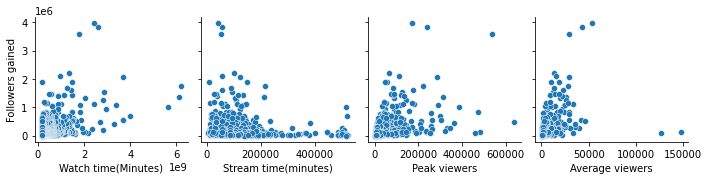

In [585]:
#outlier 확인
sns.pairplot(train_df, x_vars=['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers'], y_vars=['Followers gained'])
             

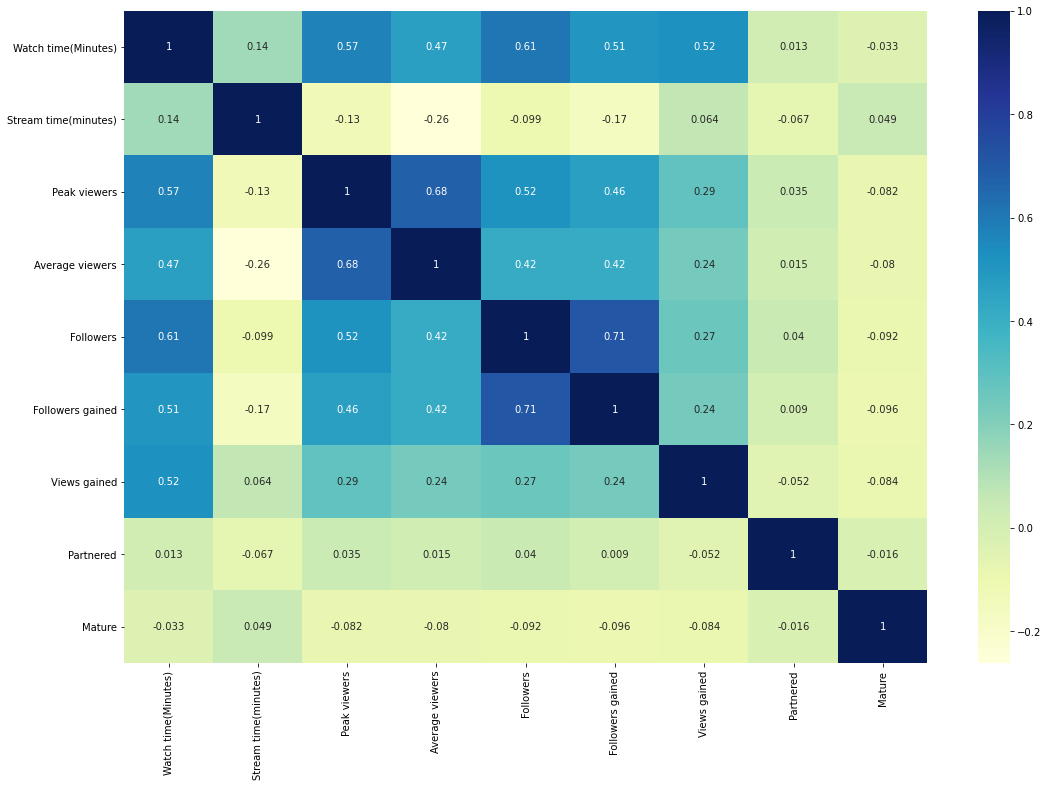

In [586]:
#correlation 확인
plt.figure(figsize=(18,12))
sns.heatmap(train_df.corr(), yticklabels='auto', annot=True, cmap='YlGnBu')
plt.show()

In [587]:
train_df

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,2ZR62O53,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English
1,ZJ31SS7Q,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,English
2,I31VI9RK,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,Portuguese
3,6GP9WLYR,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,English
4,3DVR0TDD,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,English
...,...,...,...,...,...,...,...,...,...,...,...
795,M3VVKDII,155187570,57120,19298,2647,179420,132867,4071398,1,0,Italian
796,H4RDC7MS,154982550,87945,7136,1711,245715,122045,3621969,1,1,Portuguese
797,3OR62HLN,154727730,94275,6213,1605,114154,32991,3059244,1,0,Spanish
798,Y7UCJJTF,154595850,85635,8533,1777,120494,28322,3446723,1,0,Spanish


In [590]:

x = train_df.drop(['Followers gained','Channel', 'Partnered','Mature','Language'], axis=1)
y = train_df['Followers gained']


In [598]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=25)

# Linear Regression

In [599]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [600]:
ypred_test = lr.predict(xtest)
print("Accuracy of testing data:", metrics.r2_score(ytest, ypred_test)*100)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred_test)))

Accuracy of testing data: 46.9134949213741
Root Mean Squared Error: 207167.71066057254


# Random Forest

In [601]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250,1000,2000],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1,0.5],
    'max_features': ['auto', 'sqrt']}
estimator = RandomForestRegressor()


In [602]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [604]:
# define grid_search
grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2)

# fit with (x_train, y_train)
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 6, 9, 12],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [50, 100, 150, 200, 250, 1000, 2000]},
             verbose=2)

In [ ]:
grid_search.best_params_

In [606]:
rfr = RandomForestRegressor(max_depth=9,
                            n_estimators=2000,
                            ccp_alpha=0.05)
rfr.fit(xtrain, ytrain)

RandomForestRegressor(ccp_alpha=0.05, max_depth=9, n_estimators=2000)

In [607]:
ypred_train = rfr.predict(xtrain)
ypred_test = rfr.predict(xtest)
print(ypred_train.shape)
print(ypred_test.shape)

(640,)
(160,)


In [617]:
print("Accuracy of testing data:", metrics.r2_score(ytest, ypred_test)*100)

Accuracy of testing data: 58.23060203861


In [609]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred_test)))

Root Mean Squared Error: 183763.4379503329


# Submission

In [610]:
xtest = test_df.drop(['Channel', 'Partnered','Mature','Language'], axis=1)
print(xtest.shape)

(200, 6)


In [614]:
rfr.fit(xtrain,ytrain)
pred=rfr.predict(xtest)
print(pred.shape)

(200,)


In [615]:
df = {'Channel': test_df['Channel'], 'followers gained': pred}
result = pd.DataFrame(df)
print(result)

      Channel  followers gained
0    97R8L3J0     161585.803080
1    6UV44QFF      55525.830126
2    2WKQZUGR     185515.737587
3    R4DGVX2D     111538.450904
4    P8YSNIOI      48336.217913
..        ...               ...
195  8Q556ABI     268820.090438
196  AXQ2XZ45      66392.553808
197  AP7UE7SZ      37630.565365
198  PNCBWRE4     121307.209786
199  7S7Y639P      97093.329205

[200 rows x 2 columns]


In [ ]:
result.to_csv('/Users/min/Downloads/aidl/submission.csv',index=False)